In [67]:
import numpy as np
import pandas as pd
import os
import cmocean
import datetime
filename = '/Users/bell/in_and_outbox/2018/stabeno/ice_chukchi/coords_SChukchi.asc'
dfi = pd.read_csv(filename,sep=',')

In [2]:
directory = '/Users/bell/in_and_outbox/2018/stabeno/ice_chukchi/ssmi_ice_for_shaun/merged/'

#subset the data
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".asc2"):
        df = pd.read_csv(directory+filename,names=['lat','lon','ice','count'],sep='\s+')
        #(df.iloc[dfi.findex.values]).to_csv(directory+filename.replace(".asc2",".subset.asc2"))
        #(df.iloc[dfi.findex.values]['ice']).to_frame().T.to_csv('coords_SChukchi_noland.asc',mode='a')
        (df.iloc[dfi.findex.values]['ice']).to_frame().mean().to_csv('coords_SChukchi_noland_mean.asc',mode='a+')
    else:
        continue

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


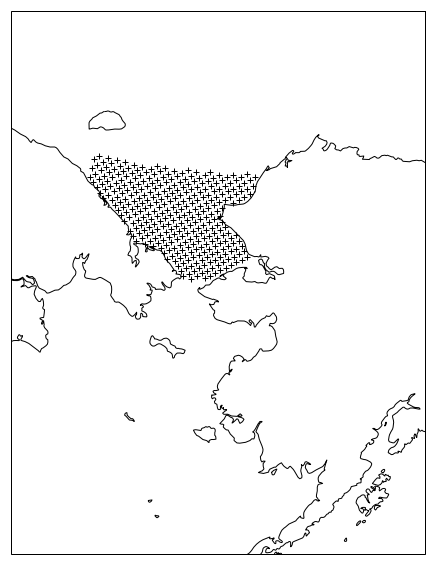

In [2]:
#%%#using Cartopy for mapping
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def erddap_etopo1():
    """get subset of etopo1 data from erddap"""
    
    urllib.urlretrieve("http://coastwatch.pfeg.noaa.gov/erddap/griddap/etopo180.nc?altitude[(65):1:(75)][(-170):1:(-155)]","data/etopo1_tmp.nc")
    
def etopo1_subset(file='etopo1.nc', region=None):
    """ read in ardemV2 topography/bathymetry. """
    
    bathydata = Dataset(file)
    
    topoin = bathydata.variables['altitude'][:]
    lons = bathydata.variables['longitude'][:]
    lats = bathydata.variables['latitude'][:]
    bathydata.close()
    
    return(topoin, lats, lons)

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(10, 10),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

#%%
### Plot location of sample points
extent = [180, 210, 55, 75]
projection=ccrs.LambertConformal(central_longitude=200.0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)

ax.plot(dfi.lon.values,dfi.lat.values,'k+',transform=transformation)
ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

In [79]:
data = pd.read_csv('/Users/bell/in_and_outbox/2018/stabeno/ice_chukchi/through_2018_NRT/coords_SChukchi_noland_mean.csv',
                  parse_dates=True, index_col='datetime')

In [84]:
data.resample('D').mean().interpolate('linear',
                                      limit=1).to_csv('/Users/bell/in_and_outbox/2018/stabeno/ice_chukchi/through_2018_NRT/coords_SChukchi_noland_mean.daily.csv')


In [30]:
dfi.max()

findex    22198.00
lat          70.00
lon         196.83
ice         100.00
count          NaN
dtype: float64

### Without using Sigrids grids... instead Strausz's data retrieval

In [54]:
modern_fid=pd.read_csv('/Users/bell/in_and_outbox/data_sets/nrt_nasatime_seaice/nt_20200116_f18_nrt_n.csv')


In [55]:
modernfid_grid = modern_fid[(modern_fid.latitude>=66.05) & (modern_fid.latitude<=70) & (modern_fid.longitude<=0) \
                           & (modern_fid.longitude<=-163.17) & (modern_fid.ice_conc!=0)]

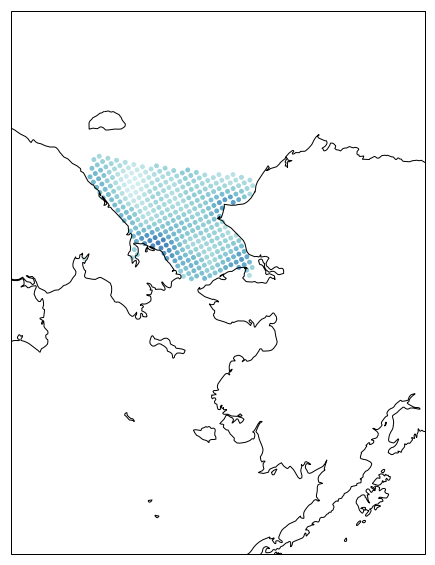

In [56]:
#%%
### Plot location of sample points
extent = [180, 210, 55, 75]
projection=ccrs.LambertConformal(central_longitude=200.0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)

ax.scatter(modernfid_grid.longitude.values,modernfid_grid.latitude.values,s=15,c=modernfid_grid.ice_conc.values,
           cmap=cmocean.cm.ice,vmin=0,vmax=100,transform=transformation)
#ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

In [68]:
directory='/Users/bell/in_and_outbox/data_sets/nrt_nasatime_seaice/'
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.csv'):
        modern_fid=pd.read_csv(directory+filename)
        modernfid_sub = modern_fid.iloc[modernfid_grid.index]
        print(datetime.datetime.strptime(filename.split('_')[1],'%Y%m%d'),modernfid_sub.ice_conc.mean())

2017-01-01 00:00:00 72.60057636887605
2017-01-02 00:00:00 62.285878962536074
2017-01-03 00:00:00 61.81095100864557
2017-01-04 00:00:00 63.7244956772334
2017-01-05 00:00:00 67.96541786743516
2017-01-06 00:00:00 66.95792507204605
2017-01-07 00:00:00 57.66916426512969
2017-01-08 00:00:00 59.49625360230544
2017-01-09 00:00:00 61.4536023054755
2017-01-10 00:00:00 64.36195965417872
2017-01-11 00:00:00 67.14466858789625
2017-01-12 00:00:00 75.65994236311238
2017-01-13 00:00:00 81.63919308357349
2017-01-14 00:00:00 82.69971181556193
2017-01-15 00:00:00 83.88126801152738
2017-01-16 00:00:00 87.57579250720458
2017-01-17 00:00:00 90.56138328530257
2017-01-18 00:00:00 91.96772334293948
2017-01-19 00:00:00 94.56829971181551
2017-01-20 00:00:00 95.87204610951017
2017-01-21 00:00:00 95.6576368876081
2017-01-22 00:00:00 96.11757925072047
2017-01-23 00:00:00 96.79769452449572
2017-01-24 00:00:00 96.90028818443807
2017-01-25 00:00:00 96.79654178674348
2017-01-26 00:00:00 96.97752161383285
2017-01-27 00:

In [61]:
modernfid_grid.index

Int64Index([49022, 51146, 51450, 51451, 51461, 51462, 51463, 51464, 51465,
            51756,
            ...
            57531, 57532, 57533, 57534, 57834, 57835, 57836, 57837, 58139,
            58140],
           dtype='int64', length=347)